In [10]:
import cooler
import pandas as pd
import numpy as np
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

# Input data to run this notebook

In [ ]:
# Merged Hi-C data
# Run 1_merge_Hi-C.sh script to obtain these maps
files=['../data/NeuNplus.sampled.1000.mcool::resolutions/250000',
       '../data/NeuNminus.sampled.1000.mcool::resolutions/250000']

# DLR calculation and plotting (Figure 1F)

/tmp/ipykernel_398775/1741384723.py:28: RuntimeWarning: divide by zero encountered in long_scalars
  DLR.append(np.log2(d/l))
/tmp/ipykernel_398775/1741384723.py:28: RuntimeWarning: invalid value encountered in long_scalars
  DLR.append(np.log2(d/l))
/tmp/ipykernel_398775/1741384723.py:28: RuntimeWarning: divide by zero encountered in log2
  DLR.append(np.log2(d/l))
/tmp/ipykernel_398775/1741384723.py:28: RuntimeWarning: divide by zero encountered in long_scalars
  DLR.append(np.log2(d/l))
/tmp/ipykernel_398775/1741384723.py:28: RuntimeWarning: invalid value encountered in long_scalars
  DLR.append(np.log2(d/l))
/tmp/ipykernel_398775/1741384723.py:28: RuntimeWarning: divide by zero encountered in log2
  DLR.append(np.log2(d/l))


Text(0, 0.5, 'DLR')

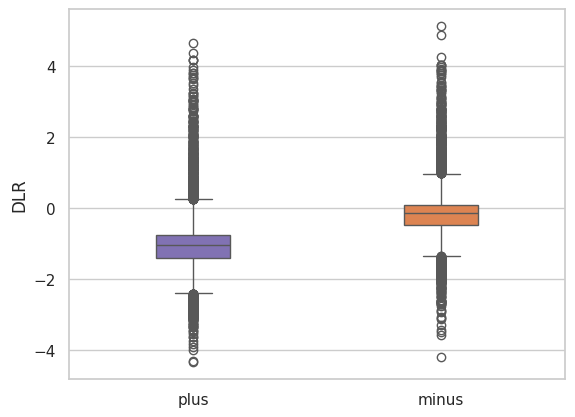

In [12]:
names=['plus','minus']

dic={}

for f in range(len(files)):
    
    coolpath = files[f]
    c = cooler.Cooler(coolpath)
    DLR=[]
    distal=[]
    local=[]
    
    for ch in c.chromnames:
        m=c.matrix(balance=False).fetch(ch)
        
        st1=0
        en2=len(m)

        for i in range(len(m)):
            a=m[i]
            en1=max(0,i-12)
            st2=min(i+12,len(a))
            l=np.nansum(a[en1:st2+1])
            d=np.nansum(a[0:en1])+np.nansum(a[st2+1:]) 
            DLR.append(np.log2(d/l))
    dic[names[f]]=DLR

df=pd.DataFrame()
for i in names:
    df[i]=dic[i]


df[np.isinf(df)]=np.nan
df.dropna(inplace=True)

sns.set(style="whitegrid")
pal=[sns.color_palette()[4],sns.color_palette()[1]]
ax = sns.boxplot(data=df,palette=pal,width=0.3,saturation=1)
order=names
# add_stat_annotation(ax, data=df,order=order,
#                     box_pairs=[('plus','minus')],
#                     test='Mann-Whitney', text_format='star', loc='inside', width=0.4,verbose=2)
plt.ylabel('DLR')
# plt.savefig('.../DLR_neurons_glia.pdf')